<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Требует подбора параметров чтобы точки не ушли в шум или кластеры не слились в один

In [9]:
# импорт библиотек
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN 
import matplotlib.pyplot as plt
%matplotlib inline

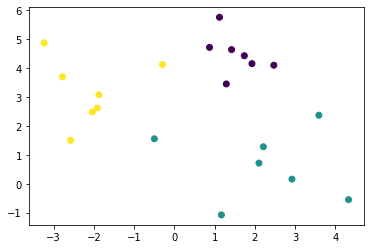

In [3]:
# создание данных - очень размытые
x, y = datasets.make_blobs(n_samples=21,
                           random_state=0)
plt.scatter(x[:, 0], x[:, 1], c=y);

In [4]:
# функция для обучения
def db(x, n, eps):
  db = DBSCAN(eps=eps,        # расстояние эпсилон
              min_samples=n)  # минимум точек в окрестности
  scaler = StandardScaler()
  x_std = scaler.fit_transform(x)              
  x_std = db.fit_predict(x_std)
  return x_std

In [5]:
# пробный вызов - почти все точки ушли в шум(-1)
print(db(x, 2, 0.1))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1]


In [6]:
# а теперь все точки по отдельным кластерам
print(db(x, 1, 0.01))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [7]:
# более менее
print(db(x, 2, 0.6))

[ 0  1  0  0  2 -1  1  1 -1 -1  2  1  2 -1  1  1  2 -1  2  1 -1]


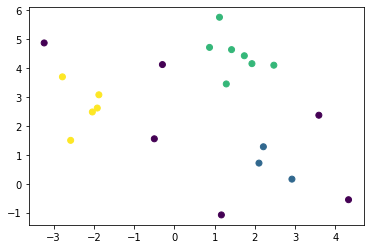

In [8]:
# визуально, фиолетовые точки - без класса (шум)
plt.scatter(x[:, 0], x[:, 1], c=db(x, 2, 0.6));